Imports

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import shutil

import random
import re
import glob
from PIL import Image,ImageDraw,ImageFont

import ENVCONFIG

/eos/home-d/drousso/SWAN_projects/Other/GANji
DAVID


User settings:

In [31]:
onlyusenewfonts=True
#onlyusenewfonts=False

characters=["福"]
characters=["體","福","新","年","快","樂","身","健","康","心","想","事","成"]

IMG_WIDTH = 300
IMG_HEIGHT = 300
text_size = 150
text_size = 200

maxplotstoshow=16
showonlyfirstcharacter=True

environment settings:

In [32]:
df = pd.read_csv('google-fonts-annotation.csv')

# change your path here
rds_dir = ENVCONFIG.rds_dir
ROOT = rds_dir+'/fonts/ofl'

new_fonts_dir="new_fonts"

define font filtering & retrieval function

In [33]:
def filter_fonts_get_paths(df, root='./', variants=['_'], subsets=['_'], category=''):
    # exceptions
    if not variants or variants == [''] or variants == '': variants = ['_']
    if not subsets or subsets == [''] or subsets == '': subsets = ['_']
    # apply filters
    regex_filters = variants + subsets + ['_'+category]
    df_new = pd.concat([df.filter(regex=re.compile(regex, re.IGNORECASE), axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
    mask = df_new.all(axis=1)
    filtered_fontnames = list(df.loc[mask].family)
    # construct file paths
    paths = []
    for fontname in filtered_fontnames:
        if variants == ['_']: # select all variants
            sel = glob.glob(f'{root}/{fontname.lower()}/**/**/**/*.ttf', recursive=True)
            paths.extend(sel)
        else:
            for variant in variants:
                sel = glob.glob(f'{root}/{fontname.lower()}/**/**/{fontname}-{variant}.ttf', recursive=True) 
                for path in sel:
                    paths.append(path)
    print(f'Found {len(paths)} font files.')
    return paths

Define font blacklist

In [34]:
fontblacklist=[
    #"福"
    'OtomanopeeOne-Regular',
    'PaletteMosaic-Regular',
    'Rock3D-Regular',
    'Shizuru-Regular',
    'YujiHentaiganaAkari-Regular',
    'YujiHentaiganaAkebono-Regular',
    
    #"體"
    'TrainOne-Regular',
    'SawarabiMincho-Regular',
    'Murecho[wght]',
    
    #new fonts: "福"
    "Chinese_Cally_TFB",
    "DFXSM1B",
    "jinmei-poster-calligraphy",
    "jinmeimaoxingshu",
    "vtmeo___",
    
    #new fonts: "體"
    "MWindyHKS-Bold",
    "bodang-xingkai",
    "zhongshan-xingshu",
]

Create data for list of characters


Starting 體
Chinese_Cally_TFB is in blacklist
DFXSM1B is in blacklist
"HanyiSentyPagoda",
"HanyiSentyPailouArch",
"HanyiSentyScholar",
"HanyiSentySpringBrush",
"HanyiSentyTang",
"HanyiSentyWEN",
"HanyiSentyZHAO",
"MWindyHK-Bold",
"MWindyHKS-Bold",
"SentyWEN2017",
"bodang-xingkai",
jinmei-poster-calligraphy is in blacklist
jinmeimaoxingshu is in blacklist
vtmeo___ is in blacklist
"zhongshan-xingshu",

Starting 福
Chinese_Cally_TFB is in blacklist
DFXSM1B is in blacklist
"HanyiSentyPagoda",
"HanyiSentyPailouArch",
"HanyiSentyScholar",
"HanyiSentySpringBrush",
"HanyiSentyTang",
"HanyiSentyWEN",
"HanyiSentyZHAO",
"MWindyHK-Bold",
"MWindyHKS-Bold",
"SentyWEN2017",
"bodang-xingkai",
jinmei-poster-calligraphy is in blacklist
jinmeimaoxingshu is in blacklist
vtmeo___ is in blacklist
"zhongshan-xingshu",

Starting 新
Chinese_Cally_TFB is in blacklist
DFXSM1B is in blacklist
"HanyiSentyPagoda",
"HanyiSentyPailouArch",
"HanyiSentyScholar",
"HanyiSentySpringBrush",
"HanyiSentyTang",
"HanyiSentyWEN",

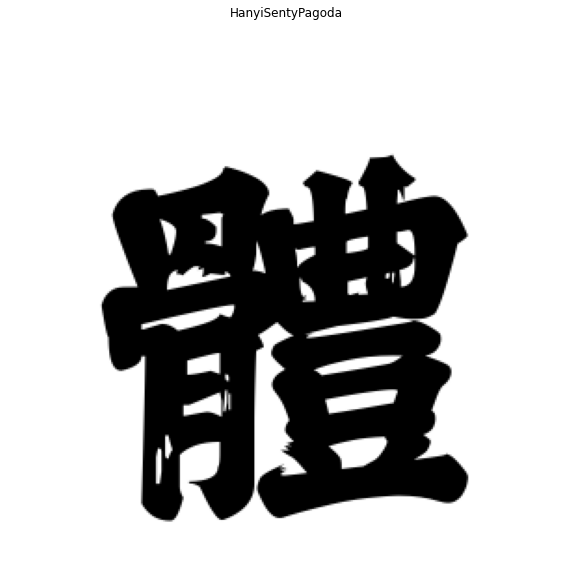

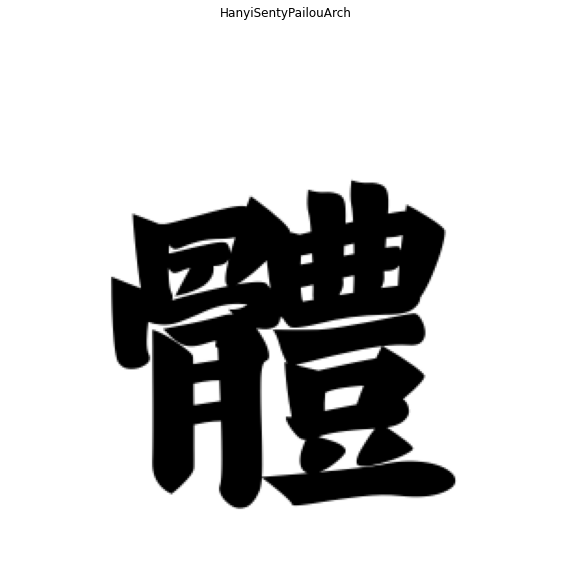

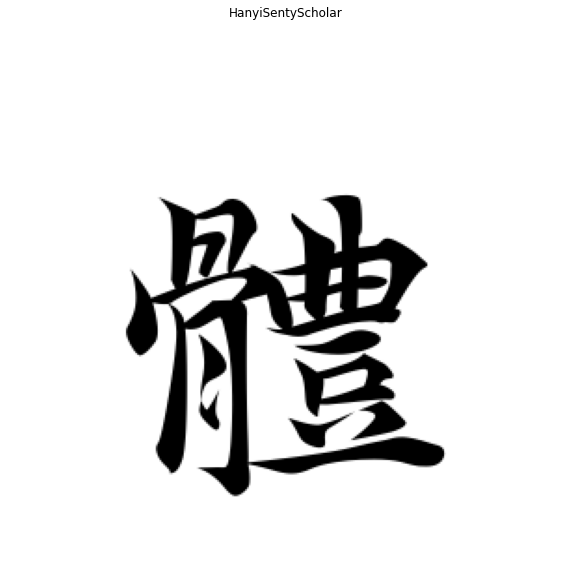

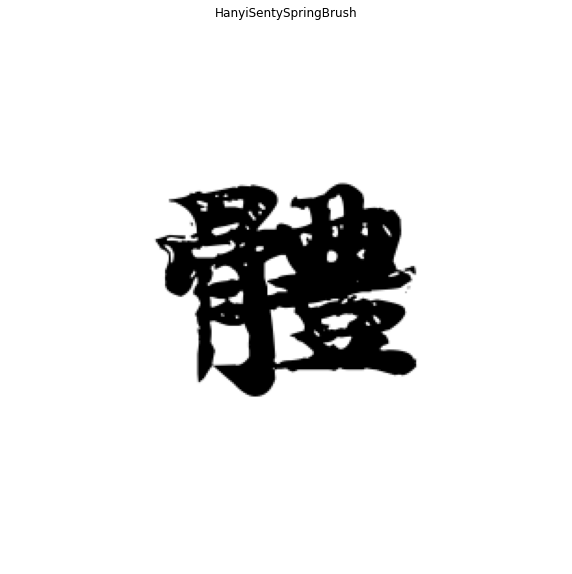

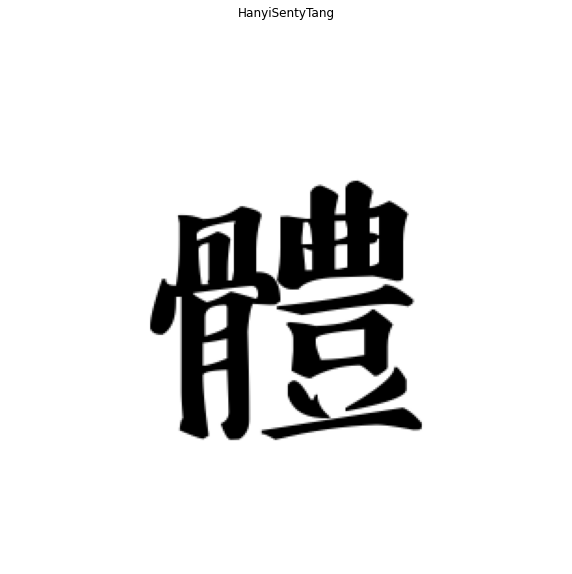

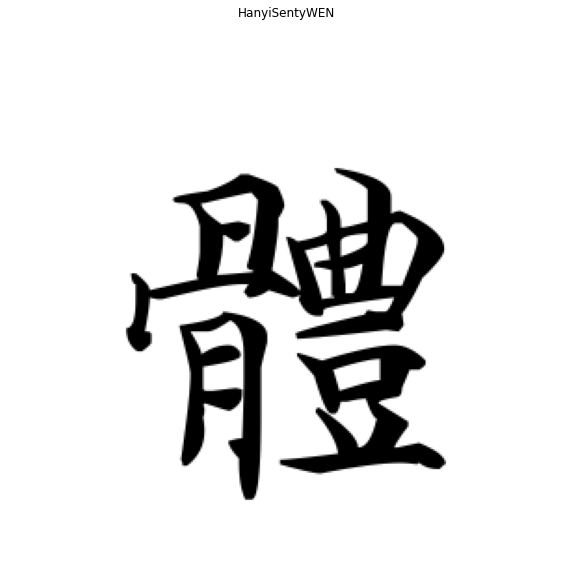

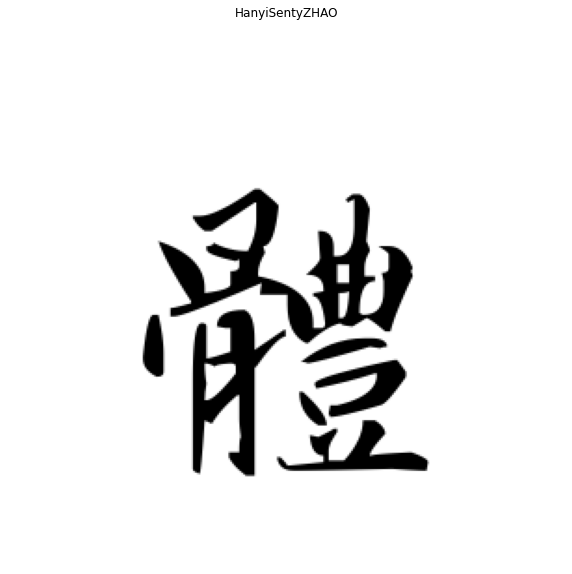

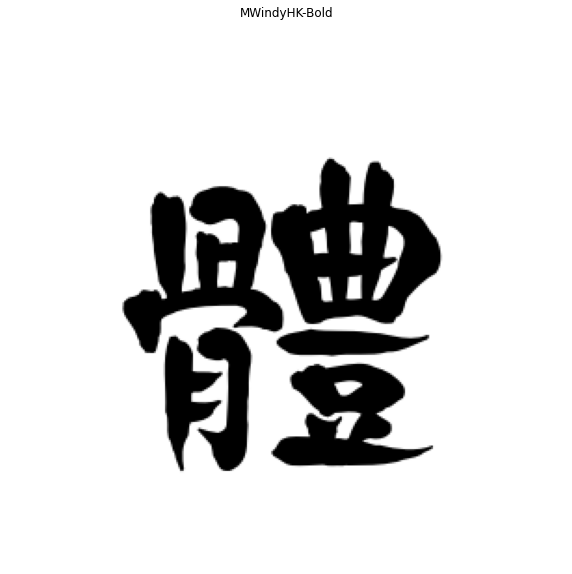

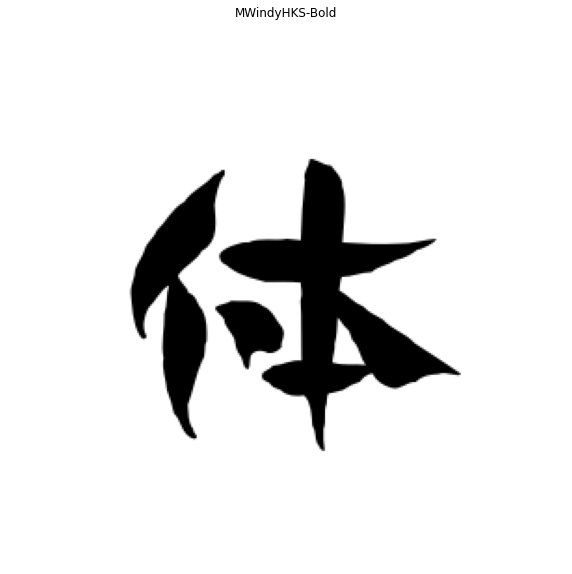

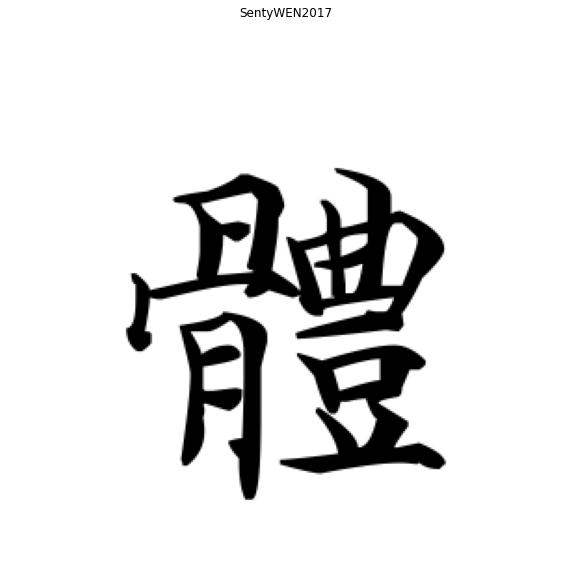

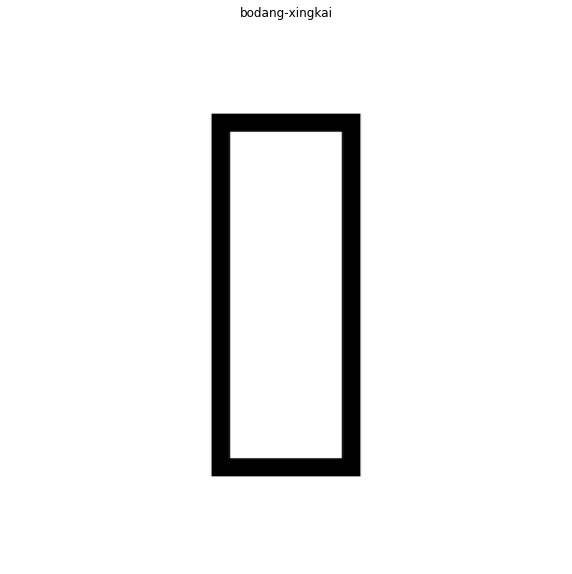

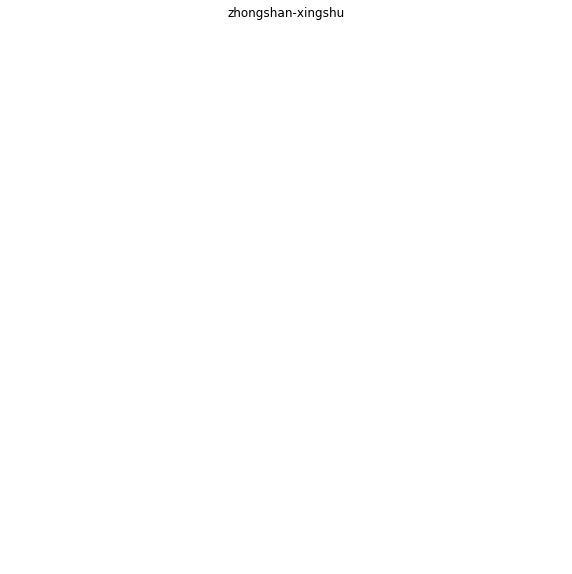

In [35]:
if onlyusenewfonts:
    paths=[]
else:
    paths = filter_fonts_get_paths(df, root=ROOT, subsets=['japanese'], variants=['_'], category='')
    
paths.extend([os.path.join(new_fonts_dir,font) for font in os.listdir(new_fonts_dir)])

dontshowplots=False
for text in characters:
    print()
    print('Starting',text)
    
    characterfolder=os.path.join('data',text)
    shutil.rmtree(characterfolder)
    try:
        os.mkdir(characterfolder)
    except:
        pass
    
    
    for r in range(len(paths)):
        # sample text and font

        fontname=os.path.basename(paths[r]).split('.')[0] 
        if fontname in fontblacklist:
            print(fontname,'is in blacklist')
            continue
            
        font = ImageFont.truetype(paths[r], text_size)

        # # get text info (not being used but may be useful)
        text_width, text_height = font.getsize(text)
        left, top, right, bottom = font.getbbox(text)
        #print('text w & h: ', text_width, text_height)
        #print(left, top, right, bottom)



        x = (right-left) # we can adjust this according to IMG_WIDTH etc
        y = IMG_HEIGHT/2 +(bottom-top)/2

        # create a blank canvas with extra space between lines
        canvas = Image.new('RGB', (IMG_WIDTH, IMG_HEIGHT), "white")

        # draw the text onto the text canvas
        draw = ImageDraw.Draw(canvas)
        x=IMG_WIDTH/2
        #y=IMG_HEIGHT/2
        draw.text((x, y), text, 'black', font, anchor='ms')

        fig = plt.figure(figsize=(10,10))
        plt.imshow(canvas, aspect='auto')
        plt.axis('off')
        plt.margins(0)
        
        filename = os.path.join(characterfolder,fontname+'.jpg')

        plt.savefig(filename,bbox_inches='tight',pad_inches=0)
        plt.title(fontname)
        print('"'+fontname+'",')
        # plt.imsave(filename, canvas, cmap='gray')
        # plt.imsave(filename, canvas)
        if r>maxplotstoshow or dontshowplots:
            plt.close()
    if showonlyfirstcharacter:
        dontshowplots=True

In [29]:
"Chinese_Cally_TFB",
"DFXSM1B",
"jinmei-poster-calligraphy",
"jinmeimaoxingshu",
"vtmeo___",

('vtmeo___',)

In [23]:
fontname=os.path.basename(paths[0]).split('.')[0] 

In [25]:
fontname in fontblacklist

False

In [26]:
fontblacklist

['OtomanopeeOne-Regular',
 'PaletteMosaic-Regular',
 'Rock3D-Regular',
 'Shizuru-Regular',
 'YujiHentaiganaAkari-Regular',
 'YujiHentaiganaAkebono-Regular',
 'TrainOne-Regular',
 'SawarabiMincho-Regular',
 'Murecho[wght]Chinese_Cally_TFB',
 'DFXSM1B',
 'jinmei-poster-calligraphy',
 'jinmeimaoxingshu',
 'vtmeo___']